In [12]:
from fastai.vision.all import *
from fastai.vision.core import *
from fastai.vision import *
from pathlib import *
import os

In [13]:
# shot_types = ['extreme_wide_shot', 'full_shot', 'medium_shot, close_up_shot']

In [14]:
BASE_SIZE = 64

In [15]:
tfms = aug_transforms(do_flip = False, flip_vert = False, mult=1.0)

In [16]:
def xtra_tfms(base_size = base_size): 
    box_dim = int(base_size/4)
    #cutout_ = partial(cutout, p = .8,   n_holes = (20, 20), length = (box_dim, box_dim))
    cutout_ = partial(cutout, p = .8, n_holes = (1,1), length = (box_dim, box_dim))
    jitter_ = partial(jitter, p = 0.5,  magnitude = (0.005, 0.01))
    skew_   = partial(skew,   p = 0.5, direction = (0, 7), magnitude = 0.2)
    squish_ = partial(squish, p = 0.5, row_pct = 0.25, col_pct = 0.25)
    tilt_   = partial(tilt,   p = 0.5, direction = (0, 3))
    perp_warp_ = partial(perspective_warp, p = 0.5, magnitude = (-0.2, 0.2))
    crop_pad_  = partial(crop_pad, p = 0.5, padding_mode = 'border', row_pct = 0.1, col_pct = 0.1)
    rgb_randomize_ = partial(rgb_randomize, thresh=0.05)

In [29]:
data= ImageDataLoaders.from_folder(path='./LearningSet', train = "train", valid_pct=0.8, item_tfms=Resize(256,144), batch_tfms=tfms, bs = 15, num_workers = 0)
data= data.cuda()

Could not do one pass in your dataloader, there is something wrong in it


In [18]:
# for term in shot_types:
#     for k, v in shot_types.items():
#         n_path = (Path('__file__').parent).joinpath(f'{k}')
#         failed = verify_images(n_path.ls())
#         failed.map(Path.unlink)

 Show random elements from data set.

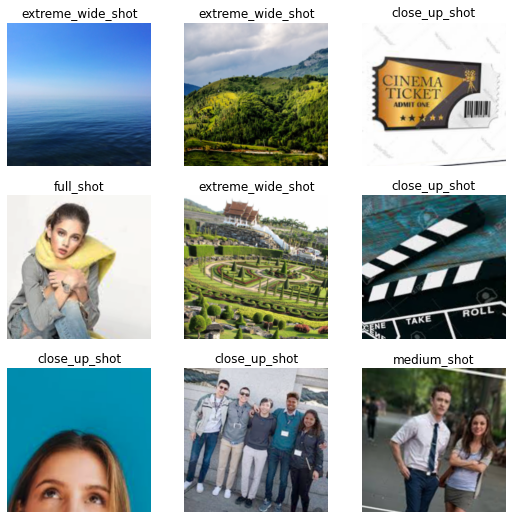

In [19]:
data.show_batch()

In [20]:
learn = cnn_learner(data, resnet50, metrics=[accuracy])
learn.fine_tune(1)

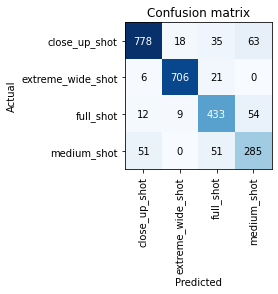

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

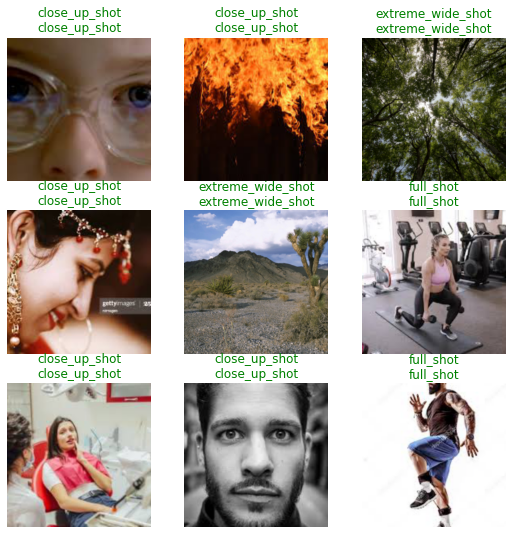

In [28]:
learn.show_results()

In [31]:
interp.plot_top_losses(9, figsize=(12,6))

AttributeError: 'AxesImage' object has no property 'heatmap_thresh'

Predicting animated models:

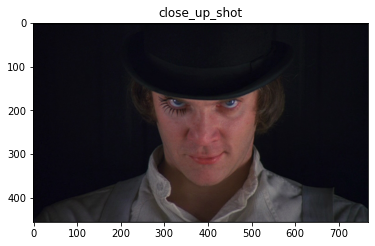

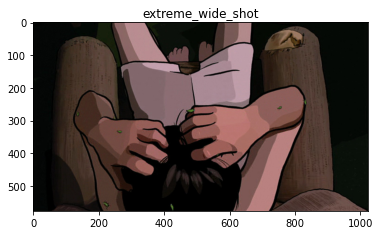

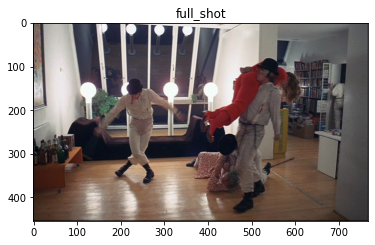

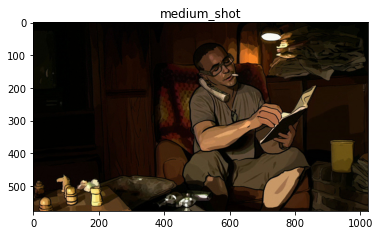

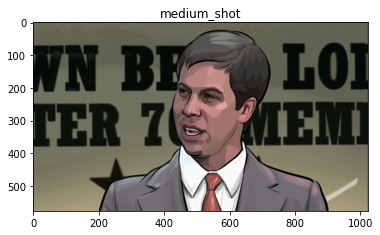

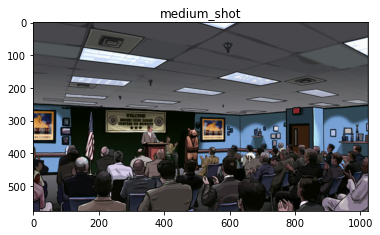

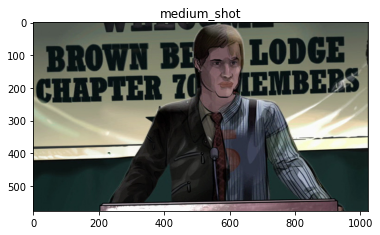

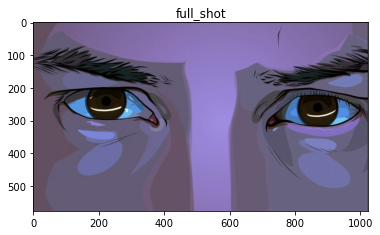

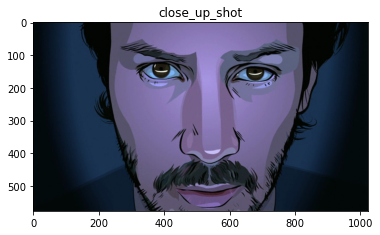

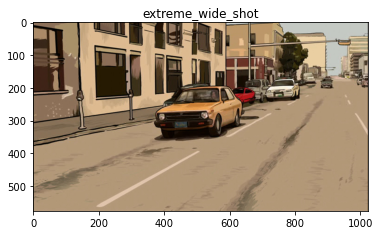

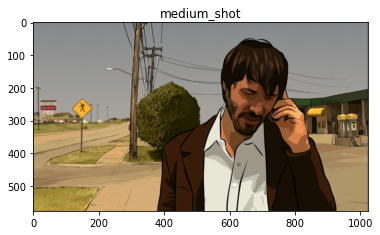

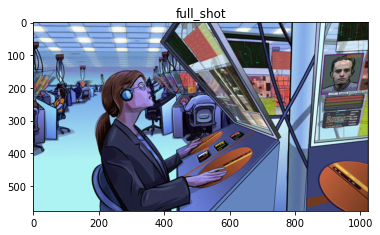

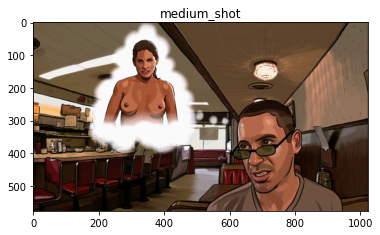

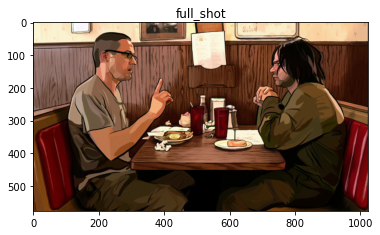

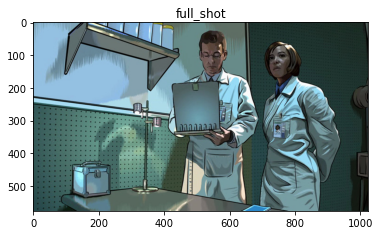

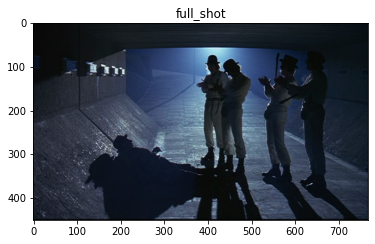

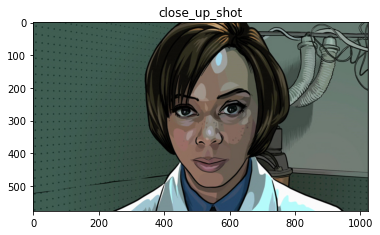

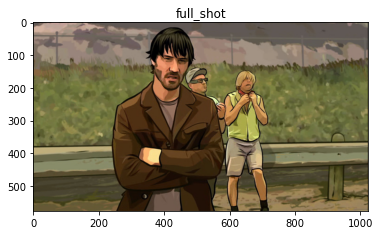

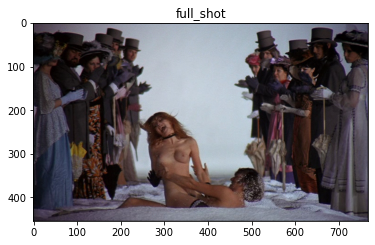

In [30]:
tmp = Path("D:\\Programowanie\\AI\\shot_classifier\\test")
tests = [file for file in tmp.iterdir()]
for file in tests:
    img = Image.open(file)
    plt.figure()
    plt.imshow(img,cmap='magma')
    plt.title(str(learn.predict(file)[0])) 

In [25]:
learn.export(os.path.abspath('./model.pkl'))